## 2차 과제

- 주제: 데이터 크롤링을 활용한 뉴스 & 리뷰 데이터 분석
- 데이터: 자유롭게 크롤링
- 사용 라이브러리: selenium, beautifulsoup, etc.

### 1. 뉴스 기사 데이터 크롤링

1.1 원하는 뉴스 기사의 본문을 크롤링하시오.

In [1]:
from collections import Counter
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re

C:\Users\HamIG\AppData\Local\Temp\ipykernel_51384\3371499652.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
url = "https://www.thescoop.co.kr/news/articleView.html?idxno=301147"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")
text = soup.get_text()

1.2 크롤링한 본문을 단어 단위로 나누고 각 단어가 나온 횟수와 함께 dataframe 형식으로 변환하시오.

In [3]:
#보고자 하는 행 수 결정 
pd.set_option('display.max_rows', 10) 

#텍스트 분할
word = text.split()

#각 단어의 등장 횟수 계산
word_count = Counter(word)

df = pd.DataFrame(list(word_count.items()), columns=["단어", "횟수"])

#단어 등장 횟수 내림차순 정렬
df_sort = df.sort_values(by='횟수', ascending=False)

df_sort

,단어,횟수
1,디도스,42
461,전체,32
840,:,17
1218,Edition,13
141,공격을,12
...,...,...
566,"했고,",1
565,접어야만,1
564,상당수는,1
562,발생했죠.,1


1.3 불용어를 제거하시오.

In [5]:
# 불용어, 숫자, 특수 기호 집합 
stop_words = set(["은", "는", "이", "가", "을", "를", "좀", "잘", "자주", "과", "으로", "에", "와", "한", "의", "더스쿠프", "전체", "Edition", "수", "년", "후", "視리즈", "공격을", "Cover", "그", 
                  "바로가기", "등", "있다는", "있습니다", "대", "닫기", "댓글", "Story", "Special", "경기를", "이혁기", "Editors", "공격이", "공격으로"])
num_regex = re.compile(r'\d+')
symbol_regex = re.compile(r'[^\w\s]')

# 불용어 제거 함수 
def clean_text(text):
    text = symbol_regex.sub('', text)  
    text = num_regex.sub('', text)      
    words = text.split()                
    filtered_words = [word for word in words if word not in stop_words]  
    return filtered_words

# 텍스트 전처리
cleaned_word = clean_text(text)

# 각 단어의 등장 횟수 계산
word_count = Counter(cleaned_word)

# 등장 횟수가 1회인 단어는 제거 
filtered_word_counts = {word: count for word, count in word_count.items() if count > 1}

# DataFrame 생성
df_news = pd.DataFrame(list(filtered_word_counts.items()), columns=["단어", "횟수"])

# 출력
df_news

,단어,횟수
0,묻지마,4
1,디도스,45
2,공격,10
3,이제,4
4,당신을,3
...,...,...
274,경제를,3
275,경제학,2
276,눈물,4
277,하반기,4


1.4 처리한 데이터를 워드아트로 변환해 어떤 단어가 가장 많이 나왔는지 확인하시오(폰트, 색 등 자유).

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

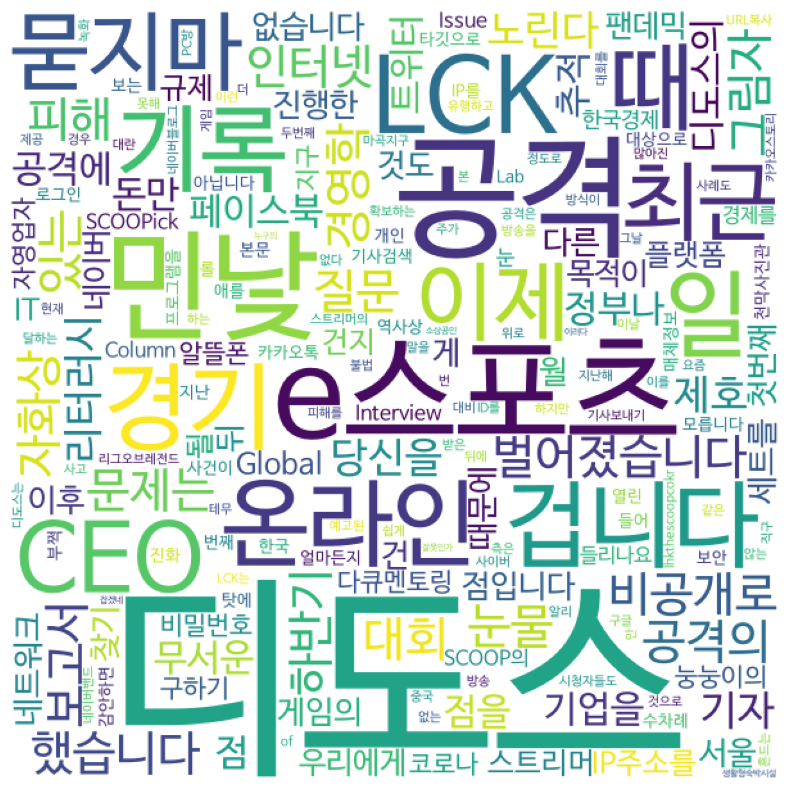

In [7]:
wordcloud = WordCloud(font_path='NanumBarunGothic.otf', background_color='white', width=600, height=600).generate_from_frequencies(word_count)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### 2. 플레이스토어 리뷰 데이터 크롤링(동적 크롤링)

2.1 100개 이상의 리뷰를 가진 앱에 있는 댓글 리뷰를 크롤링하시오.

In [8]:
# pip install google-play-scraper

In [9]:
from google_play_scraper import app

app_test = app(
    'com.navercorp.game.android.community',
    lang='ko',
    country='kr' 
)

app_test

{'title': '치지직 – CHZZK',
 'description': '방송을 시작하는 설렘부터\r\n시청자와 스트리머가 만나 소통하기까지.\r\n그 모든 순간이 즐거운\r\n치지직에서 스트리밍이 시작됩니다.\r\n\r\n⚡치지직\r\n- 다양한 스트리머들의 방송을 둘러보고 팔로우\r\n- 마음에 드는 방송은 다시 보고\r\n- 네이버페이로 편리하게 후원하고 적립까지\r\n\r\n🎧e스포츠\r\n- LCK, 롤드컵, GSL 등 주요 경기 정보와 영상 확인\r\n- 즐겨보는 리그들의 경기 알림도 받고\r\n- 고화질 라이브로 함께 시청하며 응원까지\r\n\r\n💬라운지\r\n- 좋아하는 게임의 라운지에서 소통\r\n- 네이버 게임에서 진행하는 사전예약, 이벤트 참여\r\n- 최신 뉴스, 게임 출시 등 누구보다 빠르게 정보 공유\r\n==============================================================\r\n[필수 접근 권한]\r\n- 카메라: 게시글 및 프로필 사진으로 촬영한 사진을 첨부할 수 있습니다.\r\n- 알림: 공지사항이나 이벤트 알림, 새글 알림 등을 받으실 수 있습니다. (OS 버전 13.0 이상 단말에서만 사용)\r\n- 파일 및 미디어(사진 및 동영상, 음악 및 오디오) : 게시글 및 댓글에 첨부하거나 프로필 설정을 위해 필요한 권한입니다.\r\n- 전화: 푸시 알림 발송, 통화 실행 여부 등의 기기상태 확인을 위해 기기ID를 확인할 수 있습니다. (OS 버전 6.0 미만 단말에서만 사용)\r\n- 연락처: 네이버 간편 로그인을 이용할 수 있습니다.\r\n(OS 버전 6.0 미만 단말에서만 사용)\r\n----\r\n\r\n개발자 연락처:\r\n1588 - 3820\r\n경기도 성남시 분당구 정자일로 95, NAVER 1784, 13561\r\n----\r\n개발자 연락처 :\r\n1588-3820\r\n\r\n경기도 성남시 분당구 정자일로 95, NAVER 1784, 13561',
 'descrip

In [10]:
from google_play_scraper import Sort, reviews_all

reviews = reviews_all(
    'com.navercorp.game.android.community',
    sort=Sort.NEWEST,
    lang='ko', 
    country='kr'
)

reviews

[{'reviewId': 'ffbc23c5-7802-44be-98be-c479e9ee2a53',
  'userName': "C'est Cool",
  'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjVoffjpiJAap2IH0L2NqEzoZDuN4CgMmBKNsOl-02cs8rc',
  'content': '버퍼링 너무 걸려요 2분에 한번 걸리는듯... 방송을 볼수가 없어요',
  'score': 1,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': '2.3.1',
  'at': datetime.datetime(2024, 3, 16, 20, 42, 39),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': '2.3.1'},
 {'reviewId': '9f8d9ebb-4ba4-409f-96e5-3756899967b8',
  'userName': '김정관',
  'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjV6Jmp3HnPrnAG0_VulLVOXFrrqfgOA1X7YXWZLtyqp_Wk',
  'content': '베타라는걸 감안해도 안정성이 극히 떨어짐 특정 유저의 스트리밍만 무한 버퍼링 걸리고 주기적으로 버퍼링이 수십번 걸리니 앱 안정성이 가히 최악이라 할수있다',
  'score': 2,
  'thumbsUpCount': 1,
  'reviewCreatedVersion': None,
  'at': datetime.datetime(2024, 3, 16, 19, 12, 37),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': None},
 {'reviewId': 'aea16510-4467-4fc9-95f4-45916fb899a4',
  'userName': '엔빙',
  'userIm

2.2 크롤링한 데이터를 dataframe 형태로 변환하시오(날짜, 별점, 리뷰 유저 등).

In [11]:
import pandas as pd

review_df = pd.DataFrame(reviews)
review_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,ffbc23c5-7802-44be-98be-c479e9ee2a53,C'est Cool,https://play-lh.googleusercontent.com/a-/ALV-U...,버퍼링 너무 걸려요 2분에 한번 걸리는듯... 방송을 볼수가 없어요,1,0,2.3.1,2024-03-16 20:42:39,None,NaT,2.3.1
1,9f8d9ebb-4ba4-409f-96e5-3756899967b8,김정관,https://play-lh.googleusercontent.com/a-/ALV-U...,베타라는걸 감안해도 안정성이 극히 떨어짐 특정 유저의 스트리밍만 무한 버퍼링 걸리고...,2,1,None,2024-03-16 19:12:37,None,NaT,None
2,aea16510-4467-4fc9-95f4-45916fb899a4,엔빙,https://play-lh.googleusercontent.com/a-/ALV-U...,무슨 짓을 해도 안꺼짐 하던거 다 날리고 폰을 껐다 킨게 한두번이 아님 너무 짜증나...,1,0,2.3.1,2024-03-16 17:56:00,None,NaT,2.3.1
3,02889c34-fbb8-4955-adf0-ff777185efe4,주군,https://play-lh.googleusercontent.com/a/ACg8oc...,치지직 정식오픈때는 팔로잉도 세로해주시고 미리보기 해주세요,1,0,2.3.1,2024-03-16 16:57:59,None,NaT,2.3.1
4,136fa8d7-78d0-4bfe-ae2d-8145bcb50a0d,S쇼우,https://play-lh.googleusercontent.com/a-/ALV-U...,모바일 방송도 가능하게해주세요ㅠ,5,0,2.3.1,2024-03-16 16:08:14,None,NaT,2.3.1
...,...,...,...,...,...,...,...,...,...,...,...
393,fb3b38e6-17a9-4b3e-abfc-ffbd63cb789b,uaevuon,https://play-lh.googleusercontent.com/a-/ALV-U...,영상 대신 앱 화면 pip로 들어가버리는 버그는 대체 언제고쳐주는지. 불편해서 써먹...,1,3,2.3.0,2024-02-27 02:24:10,None,NaT,2.3.0
394,01ab3114-50d5-4acf-a252-9ad2fcbbf277,메가런쳐킬가드라,https://play-lh.googleusercontent.com/a-/ALV-U...,트위치와는 달리 미성년자 방송이 안되는건 이제 막 방송을 시작하려는 고딩에겐 좀 많...,4,1,2.2.3,2024-02-27 01:49:45,None,NaT,2.2.3
395,c22a7d79-cfe9-41f4-bc0c-c3c14d56fd64,김가오리,https://play-lh.googleusercontent.com/a-/ALV-U...,이제 막 생긴 앱이고 앞으로 많이 발전하겠지만 아직 불편한 점이 조금 있습니다. 근...,4,0,2.3.0,2024-02-27 01:30:29,None,NaT,2.3.0
396,c9a7a64d-1cc0-4586-baee-0316f2b10df5,수스,https://play-lh.googleusercontent.com/a/ACg8oc...,시청자수 5천명이넘어가면 무한버퍼링이구만 업데이트하고나서 왜이리 버퍼링이걸림?,1,2,2.3.0,2024-02-27 01:27:49,None,NaT,2.3.0


날짜, 별점, 리뷰, 유저만 가져오기

In [12]:
review_part = review_df[['at', 'userName', 'content','score']]
review_part.columns = ['날짜','유저 이름', '리뷰','평점']
review_part.head(10)

,날짜,유저 이름,리뷰,평점
0,2024-03-16 20:42:39,C'est Cool,버퍼링 너무 걸려요 2분에 한번 걸리는듯... 방송을 볼수가 없어요,1
1,2024-03-16 19:12:37,김정관,베타라는걸 감안해도 안정성이 극히 떨어짐 특정 유저의 스트리밍만 무한 버퍼링 걸리고...,2
2,2024-03-16 17:56:00,엔빙,무슨 짓을 해도 안꺼짐 하던거 다 날리고 폰을 껐다 킨게 한두번이 아님 너무 짜증나...,1
3,2024-03-16 16:57:59,주군,치지직 정식오픈때는 팔로잉도 세로해주시고 미리보기 해주세요,1
4,2024-03-16 16:08:14,S쇼우,모바일 방송도 가능하게해주세요ㅠ,5
5,2024-03-16 15:05:30,유동건,광고가 15분마다 뜨네. 버그임?,1
6,2024-03-15 21:28:47,카게로우로이드,다 좋은데 광고가 과함. 딴 방송 볼려하면 광고 또 잠깐 딴 방송 볼려하면 광고임....,4
7,2024-03-15 19:45:14,s super,Tv앱스토어에 포함좀 시켜주세요 티비로 보고싶어도 없어서 못봄,5
8,2024-03-15 19:19:12,남중태,핸드폰을 꺼도 소리가 계속 들리니까 불편해요. 그점 말곤 괜찮은것 같아요.,4
9,2024-03-15 18:23:18,성각,쓰레기어플 버퍼링 심함,1


2.3 긍정 리뷰와 부정 리뷰를 나누시오(기준은 자유).

In [13]:
posit_rev = review_part[review_part['평점'] >= 4]

negat_rev = review_part[review_part['평점'] <= 2]

In [14]:
print('긍정 리뷰')
posit_rev = posit_rev.sort_values(by='평점', ascending=False)
posit_rev.head(10)

긍정 리뷰


,날짜,유저 이름,리뷰,평점
4,2024-03-16 16:08:14,S쇼우,모바일 방송도 가능하게해주세요ㅠ,5
190,2024-03-02 01:49:13,백공,빠른수정 감사합니다 사랑해요 치지직,5
222,2024-02-29 23:33:49,김영훈,만들어주셔서 감사합니다..,5
218,2024-03-01 00:19:51,이스에,치지직 구독 선물 🎁 기능이 있으면 좋겠습니다,5
217,2024-03-01 00:49:59,윤지넌,치지직,5
349,2024-02-27 16:37:36,할거없서,good,5
350,2024-02-27 16:26:25,영뿌,여기에 누가 별점테러를하였는가~,5
208,2024-03-01 07:32:36,gggoup,2월말 즈음부터 영상 옵션버튼을 눌러도 화면만 어두워지고 옵션창이 안 나오는 버그가...,5
207,2024-03-01 09:00:18,카이바세토,👍,5
197,2024-03-01 18:33:58,데미얀드캬미엘,TV에서는 안되나요? 트위치나아프리카등은 가능한데 치지직은 안되네요 큰화면으로 보고...,5


In [15]:
print('부정 리뷰')
negat_rev = negat_rev.sort_values(by='평점', ascending=True)
negat_rev.head(10)

부정 리뷰


,날짜,유저 이름,리뷰,평점
0,2024-03-16 20:42:39,C'est Cool,버퍼링 너무 걸려요 2분에 한번 걸리는듯... 방송을 볼수가 없어요,1
225,2024-02-29 22:43:21,김은서,와 진짜 렉이 너무걸림..ㅋㅋ 720p로 보는데도 진짜 15초에 한번 끊기는..,1
229,2024-02-29 22:05:47,차차,채팅창도 안뜨고 화질설정도 할수없음 ㅡㅡ 갤23울트라,1
231,2024-02-29 21:40:50,찌뿌,방송 채팅다는게 안되는데 오류인건가요? 왜 안되는 건지,1
237,2024-02-29 17:20:37,Jun g,해상도 설정이 왜 안되는겁니까? 고쳐주새요,1
238,2024-02-29 16:54:12,한준영,오늘 깔았는데 화질 개같아서 지움 원래 이런거임??설정도 안되고??네이버 뭐 별거없...,1
240,2024-02-29 15:25:31,신세환,차지직 생방보는데 렉때문에 자주 끊기고 강제종료가 되는일이 자주 일어남. 개선이 필...,1
242,2024-02-29 13:36:17,RwbyRose,정말 필요했던 가능들 다 들어간거 같아요. 하지만 문제 점도 많이 있네요 1. 딜레...,1
224,2024-02-29 23:13:48,후룸라이드,모바일 앱 밝기/음량 조절 왜만듦?,1
243,2024-02-29 10:53:55,니시노 나나세TV나나세마루,만든것도 어디 3류 지1잡대 꼴통이 처졸면서 만들었나 운좋게 글로벌 대기업 트위치가...,1


### 3. 자유 분석

3.1 위에서 크롤링한 데이터들을 활용해 자유롭게 인사이트를 도출하시오.

In [60]:
# pip install konlpy

In [16]:
from konlpy.tag import Okt
from collections import Counter

In [43]:
# 긍정 리뷰 데이터 수
positive_count = len(review_part[review_part['평점'] >= 4])

# 부정 리뷰 데이터 수
negative_count = len(review_part[review_part['평점'] <= 2])

# 전체 리뷰 수 
total_count = len(review_part)

# 긍정 리뷰와 부정 리뷰가 차지하는 비율 
positive_ratio = positive_count / total_count
negative_ratio = negative_count / total_count

print("평점이 4점 이상인 데이터 비율:", positive_ratio)
print("평점이 2점 이하인 데이터 비율:", negative_ratio)


평점이 4점 이상인 데이터 비율: 0.36432160804020103
평점이 2점 이하인 데이터 비율: 0.45979899497487436


긍정 리뷰 분석

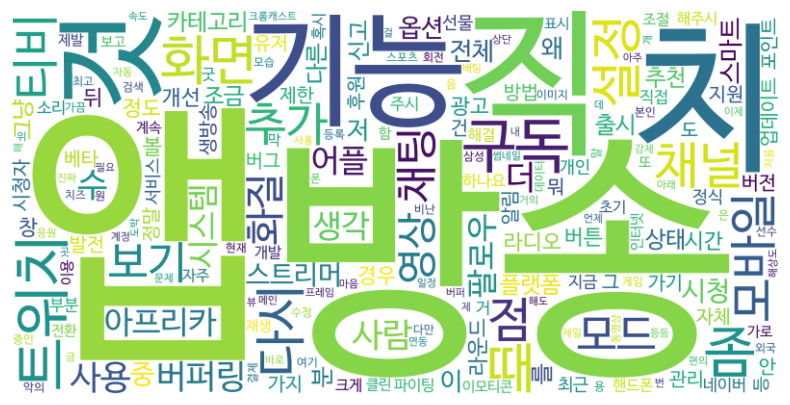

In [47]:
# 형태소 분석기
okt = Okt()

content = posit_rev

token = []

for content in posit_rev['리뷰']:
    token.extend(okt.nouns(content))

# 단어 빈도수 계산
wc = Counter(token)

# 긍정 리뷰 개수 = 3360개 x 0.36 = 1209개 
filtered_word_counts = {word: count for word, count in wc.items() if count > 400}

wordcloud = WordCloud(font_path='NanumBarunGothic.otf', background_color='white', width=800, height=400).generate_from_frequencies(wc)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

긍정 리뷰 중에서 많이 등장하는 단어는 앱, 방송, 기능, 트위치, 모바일이 있다.   
치지직은 원래 네이버에서 게임 커뮤니티 앱으로 출시되었으나, 인터넷 방송 플랫폼인 트위치가 한국 서비스를 중단한다는 소식을 듣고 인터넷 방송 플랫폼으로 전환하였다.    
그래서 인터넷 방송을 즐겨 보던 사람들은 트위치를 대체할 방송 플랫폼이 생겨난 것을 다행으로 여겨 위 단어들을 많이 언급한 것으로 보인다. 

\
다만, 충분한 준비 없이 전환한 만큼 미흡한 부분이 많았는지 긍정 리뷰만 추출했음에도 불구하고 개선, 버퍼링, 업데이트, 버그 등 개선 사항도 보인다. 

부정 리뷰 분석

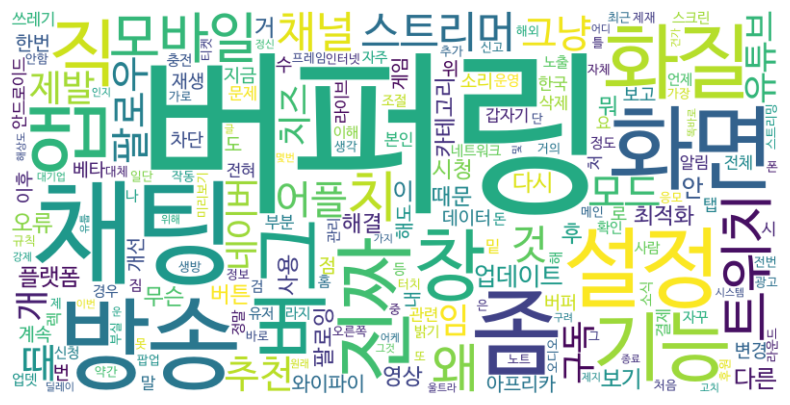

In [50]:
# 형태소 분석기
okt = Okt()

content = negat_rev

token = []

for content in negat_rev['리뷰']:
    token.extend(okt.nouns(content))

# 단어 빈도수 계산
wc = Counter(token)

# 부정 리뷰 개수 = 3360개 x 0.46 = 2150개
# 단, 모든 부정 리뷰가 
filtered_word_counts = {word: count for word, count in wc.items() if count > 700}

wordcloud = WordCloud(font_path='NanumBarunGothic.otf', background_color='white', width=800, height=400).generate_from_frequencies(wc)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

가장 많이 등장한 단어 중에서 유심히 볼 것은 버퍼링, 채팅, 버그, 화질, 설정 등이 있는데, 방송 시청에 있어 불편한 사항들을 리뷰로 남긴 것으로 보인다.  

트위치라는 단어가 여기에서도 등장하는데, 트위치와 치지직을 비교하면서 부정적인 리뷰를 다는 사람들이 많은 것으로 보인다. 

진짜, 좀, 제발 등의 단어가 등장하는 것으로 보아, 사람들이 앱의 기능에 대해 답답한 부분이 많은 것 같다. 

